世界の災害の歴史

世の中ではどんな災害がどこで起こっているのだろうかをこのpython notebookにまとめる。

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
emdat = pd.read_csv('emdat.csv')

災害の種類別発生件数

flood(洪水)が一番多く、その次にstorm(嵐)が多い。地震は3番目に多いが、上位2つと比べるとかなり減っている。地震のニュースの頻度から考えるとかなり少なく感じるが、日本は地震大国なため世界と比べて地震がとても多いからであると思われる。

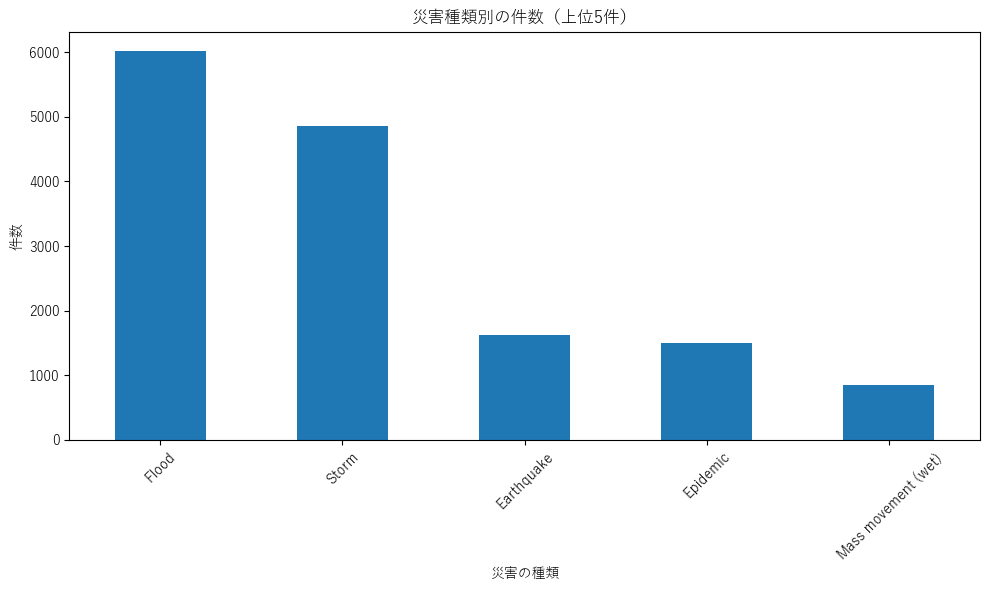

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager

# 日本語フォント設定

jp_fonts = [
    "IPAexGothic",
    "Noto Sans CJK JP",
    "TakaoGothic",
    "VL Gothic",
    "Yu Gothic",
    "MS Gothic"
]

available_fonts = set(f.name for f in font_manager.fontManager.ttflist)
selected_font = None

for f in jp_fonts:
    if f in available_fonts:
        selected_font = f
        break

if selected_font:
    plt.rcParams['font.family'] = selected_font
    


df = pd.read_csv("emdat.csv")

# 災害種別列が存在するか確認
if "Disaster Type" not in df.columns:
    print("CSV 内に 'Disaster Type' 列がありません。実際の列名を教えてください。")
else:
    # 災害種別の上位5件を集計
    counts = df["Disaster Type"].value_counts().head(5)

    # 棒グラフ描画

    plt.figure(figsize=(10, 6))
    counts.plot(kind="bar")

    plt.title("災害種類別の件数（上位5件）")
    plt.xlabel("災害の種類")
    plt.ylabel("件数")
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()


地域別発生件数

アジアが一番多く、次に(南北)アメリカ、アフリカといった順になっている。アジアは世界でもダントツで人口が多いのでやはり災害件数も多いという結果になった。

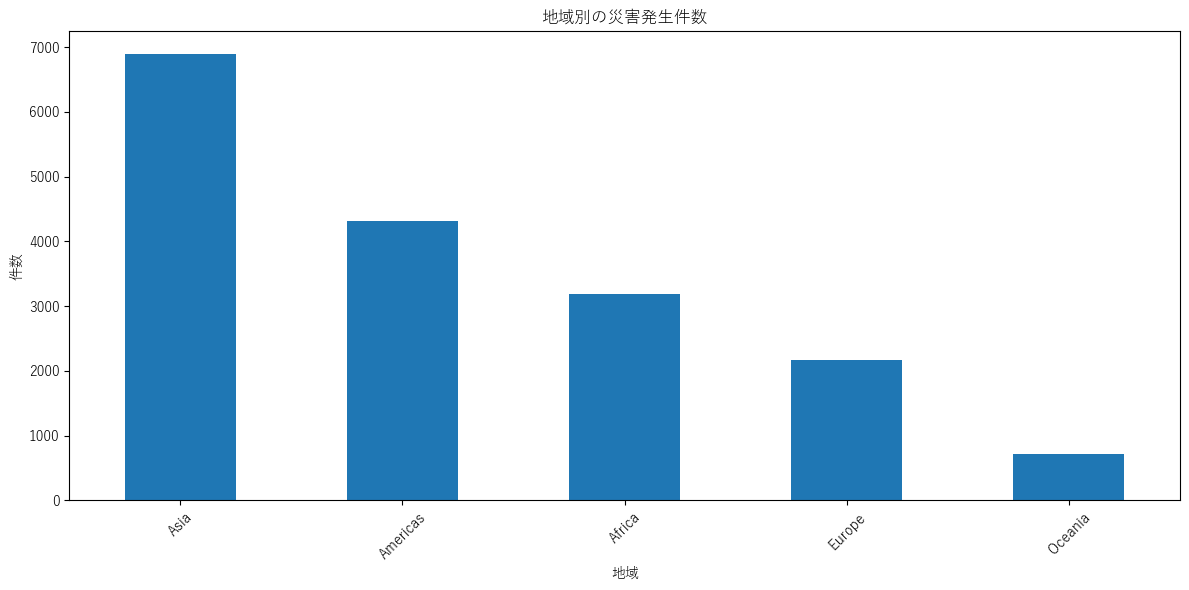

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager

# 日本語フォント設定
jp_fonts = [
    "IPAexGothic",
    "Noto Sans CJK JP",
    "TakaoGothic",
    "VL Gothic",
    "Yu Gothic",
    "MS Gothic"
]

available_fonts = set(f.name for f in font_manager.fontManager.ttflist)
selected_font = None

for f in jp_fonts:
    if f in available_fonts:
        selected_font = f
        break

if selected_font:
    plt.rcParams['font.family'] = selected_font



df = pd.read_csv("emdat.csv")


# 地域別（Region）が存在するか確認

if "Region" not in df.columns:
    print("CSV 内に 'Region' 列がありません。実際の列名を教えてください。")
else:
    # =========================
    # 地域別件数を集計
    # =========================
    region_counts = df["Region"].value_counts()

    # =========================
    # グラフ描画
    # =========================
    plt.figure(figsize=(12, 6))
    region_counts.plot(kind="bar")

    plt.title("地域別の災害発生件数")
    plt.xlabel("地域")
    plt.ylabel("件数")
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()


国別の災害件数上位20か国

アメリカ、中国、インドといった人口が多い国が災害件数も多いという結果になっている。その地域の人口と災害件数は比例の関係があると見てもいいかもしれない。

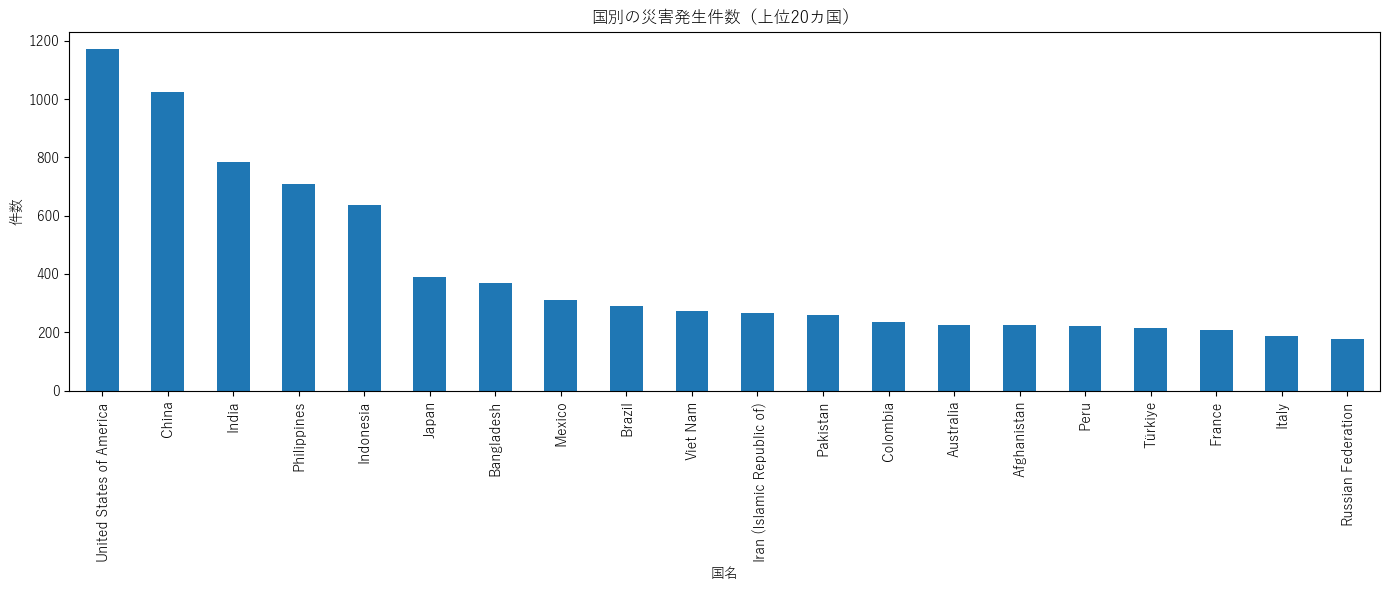

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager

# 日本語フォント設定
jp_fonts = [
    "IPAexGothic",
    "Noto Sans CJK JP",
    "TakaoGothic",
    "VL Gothic",
    "Yu Gothic",
    "MS Gothic"
]

available_fonts = set(f.name for f in font_manager.fontManager.ttflist)
selected_font = None

for f in jp_fonts:
    if f in available_fonts:
        selected_font = f
        break

if selected_font:
    plt.rcParams['font.family'] = selected_font
  

# CSV 読み込み

df = pd.read_csv("emdat.csv")


# 国別（Country）が存在するか確認

if "Country" not in df.columns:
    print("CSV 内に 'Country' 列がありません。実際の列名を教えてください。")
else:
    # 
    country_counts = df["Country"].value_counts().head(20)

    
    plt.figure(figsize=(14, 6))
    country_counts.plot(kind="bar")

    plt.title("国別の災害発生件数（上位20カ国）")
    plt.xlabel("国名")
    plt.ylabel("件数")
    plt.xticks(rotation=90)

    plt.tight_layout()
    plt.show()


In [1]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster

# --- CSV読み込み ---
df = pd.read_csv("emdat.csv")

# 緯度・経度カラム名を自動検出
lat_cols = ["Latitude", "latitude", "Lat", "lat"]
lon_cols = ["Longitude", "longitude", "Lon", "lon"]

lat_col = next((c for c in lat_cols if c in df.columns), None)
lon_col = next((c for c in lon_cols if c in df.columns), None)

if lat_col is None or lon_col is None:
    raise ValueError("CSVに緯度(latitude)・経度(longitude)の列がありません")

# 地図の中心（平均値）
center_lat = df[lat_col].mean()
center_lon = df[lon_col].mean()

# --- Foliumマップ作成 ---
m = folium.Map(location=[center_lat, center_lon], zoom_start=2)

# マーカークラスター（大量データに有効）
marker_cluster = MarkerCluster().add_to(m)

# --- マーカー追加 ---
for _, row in df.iterrows():
    lat = row[lat_col]
    lon = row[lon_col]

    # NaNはスキップ
    if pd.isna(lat) or pd.isna(lon):
        continue

    # 表示する情報（存在しない列は自動で除外）
    popup_info = []

    for col in ["Region", "Country", "Disaster Type", "Disaster Subtype",
                "Start Year", "Start Month", "Start Day"]:
        if col in df.columns and pd.notna(row[col]):
            popup_info.append(f"<b>{col}</b>: {row[col]}")

    popup_html = "<br>".join(popup_info)

    # マーカー作成
    folium.CircleMarker(
        location=[lat, lon],
        radius=5,
        color="blue",
        fill=True,
        fill_opacity=0.6,
        tooltip=f"{row.get('Region', '')} / {row.get('Disaster Type', '')}",
        popup=folium.Popup(popup_html, max_width=300)
    ).add_to(marker_cluster)

# --- HTMLファイルとして保存 ---
m.save("disaster_map_folium.html")
print("生成完了: disaster_map_folium.html")


生成完了: disaster_map_folium.html
